In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/drinks.csv'

In [3]:
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [4]:
pd.read_table(url,sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [5]:
data=pd.read_excel('beer-servings.xlsx')

In [6]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1.0,Albania,89.0,132.0,54.0,4.9,Europe
2,2.0,Algeria,25.0,0.0,14.0,0.7,Africa
3,3.0,Andorra,245.0,138.0,312.0,12.4,Europe
4,4.0,Angola,217.0,57.0,45.0,5.9,Africa


In [7]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [9]:
data.shape

(193, 6)

In [10]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [11]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [12]:
num_cols=data[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]

In [13]:
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)

In [16]:
type(num_cols)

numpy.ndarray

In [17]:
num_cols=pd.DataFrame(num_cols,columns=[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']])

In [22]:
type(num_cols)

pandas.core.frame.DataFrame

In [23]:
num_cols.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9


In [50]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [63]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

In [58]:
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [65]:
data=pd.read_excel('beer-servings.xlsx', index_col='Unnamed: 0')

In [66]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [ ]:
#method 2

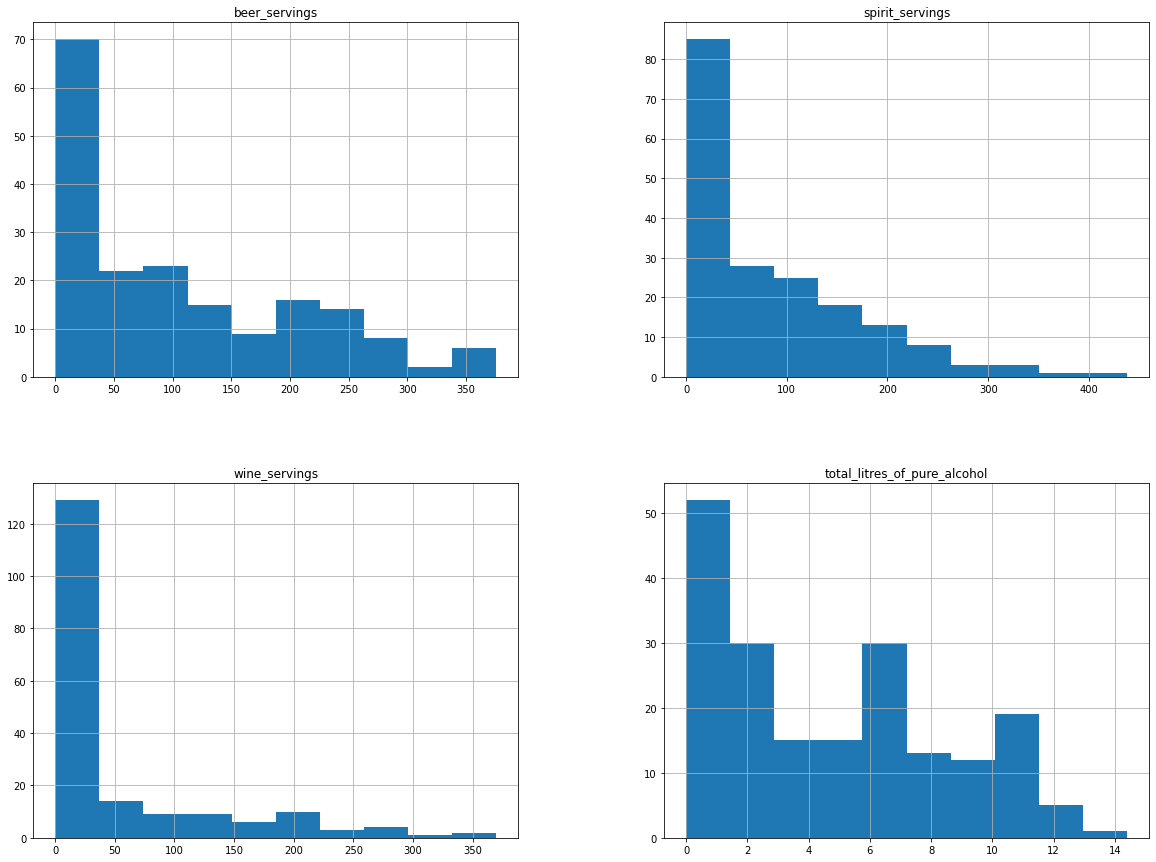

In [70]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [71]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [72]:
data['beer_servings']=data['beer_servings'].fillna(data['beer_servings'].median())

In [73]:
data['beer_servings'].isna().sum()

0

In [74]:
for i in ['spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']:
       data[i]=data[i].fillna(data[i].median())

In [75]:
data.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

##Managing Outliers

Text(0.5, 1.0, 'Boxplot of Beer Servings column')

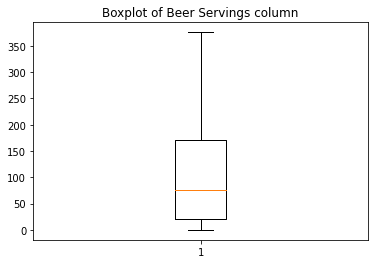

In [76]:
plt.boxplot(data['beer_servings'])
plt.title('Boxplot of Beer Servings column')

Text(0.5, 1.0, 'Boxplot of spirit servings column')

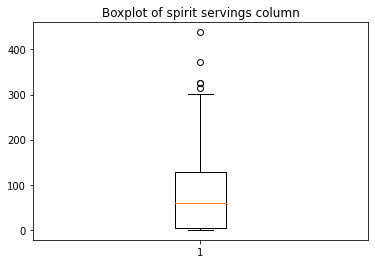

In [77]:
plt.boxplot(data['spirit_servings'])
plt.title('Boxplot of spirit servings column')

In [78]:
 Q1=np.percentile(data['spirit_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['spirit_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['spirit_servings'],75,interpolation='midpoint')

In [79]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [80]:
data['spirit_servings'].median()

60.0

In [81]:
IQR =Q3-Q1

In [82]:
print(IQR)

123.0


In [99]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [84]:
print(low_lim)
print(up_lim)

-179.5
312.5


In [86]:
outlier=[]
for x in data['spirit_servings']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)

In [87]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [88]:
ind = data['spirit_servings']>up_lim

In [90]:
data.loc[ind].index

Float64Index([15.0, 68.0, 73.0, 141.0, 144.0], dtype='float64')

In [91]:
data.drop([15,68,73,141,144],inplace=True)

In [93]:
data.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0.0,Afghanistan,0.0,0.0,0.0,0.00,Asia
1.0,Albania,89.0,132.0,54.0,4.90,Europe
2.0,Algeria,25.0,0.0,14.0,0.70,Africa
3.0,Andorra,245.0,138.0,312.0,12.40,Europe
4.0,Angola,217.0,57.0,45.0,5.90,Africa
5.0,Antigua & Barbuda,102.0,128.0,45.0,4.90,North America
6.0,Argentina,76.0,25.0,221.0,8.30,South America
7.0,Armenia,21.0,179.0,11.0,3.80,Europe
8.0,Australia,261.0,72.0,212.0,10.40,Oceania
9.0,Austria,279.0,75.0,191.0,9.70,Europe


#Outlier of wine_servings

In [95]:
Q1=np.percentile(data['wine_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['wine_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['wine_servings'],75,interpolation='midpoint')

In [96]:
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
57.5


In [97]:
data['wine_servings'].median()

9.0

In [98]:
IQR =Q3-Q1

In [100]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

In [101]:
print(low_lim)
print(up_lim)

-83.75
142.25


In [103]:
outlier=[]
for x in data['wine_servings']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)

In [104]:
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [105]:
ind = data['wine_servings']>up_lim

In [106]:
data.loc[ind].index

Float64Index([  3.0,   6.0,   8.0,   9.0,  16.0,  35.0,  42.0,  48.0,  55.0,
               61.0,  64.0,  65.0,  67.0,  75.0,  81.0,  83.0,  99.0, 120.0,
              121.0, 136.0, 140.0, 156.0, 165.0, 166.0, 182.0, 185.0],
             dtype='float64')

In [107]:
data.drop([3.0,   6.0,   8.0,   9.0,  16.0,  35.0,  42.0,  48.0,  55.0,
               61.0,  64.0,  65.0,  67.0,  75.0,  81.0,  83.0,  99.0, 120.0,
              121.0, 136.0, 140.0, 156.0, 165.0, 166.0, 182.0, 185.0],inplace=True)

In [108]:
data.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0.0,Afghanistan,0.0,0.0,0.0,0.00,Asia
1.0,Albania,89.0,132.0,54.0,4.90,Europe
2.0,Algeria,25.0,0.0,14.0,0.70,Africa
4.0,Angola,217.0,57.0,45.0,5.90,Africa
5.0,Antigua & Barbuda,102.0,128.0,45.0,4.90,North America
7.0,Armenia,21.0,179.0,11.0,3.80,Europe
10.0,Azerbaijan,21.0,46.0,5.0,1.30,Europe
11.0,Bahamas,122.0,176.0,51.0,6.30,North America
12.0,Bahrain,42.0,63.0,7.0,2.00,Asia
13.0,Bangladesh,76.0,60.0,9.0,4.25,Asia


#Outlier for Total_liters_of_pure_alcohol

In [109]:
Q1=np.percentile(data['total_litres_of_pure_alcohol'],25,interpolation='midpoint')
Q2=np.percentile(data['total_litres_of_pure_alcohol'],50,interpolation='midpoint')
Q3=np.percentile(data['total_litres_of_pure_alcohol'],75,interpolation='midpoint')

In [110]:
print(Q1)
print(Q2)
print(Q3)

1.0
2.8
6.3


In [111]:
data['total_litres_of_pure_alcohol'].median()

2.8

In [112]:
IQR =Q3-Q1

In [113]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

In [114]:
print(up_lim)
print(low_lim)

14.25
-6.949999999999999


In [115]:
outlier=[]
for x in data['total_litres_of_pure_alcohol']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)

In [117]:
outlier

[]

In [119]:
ind = data['total_litres_of_pure_alcohol']>up_lim

In [120]:
data.loc[ind].index

Float64Index([], dtype='float64')

In [121]:
data.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0.0,Afghanistan,0.0,0.0,0.0,0.00,Asia
1.0,Albania,89.0,132.0,54.0,4.90,Europe
2.0,Algeria,25.0,0.0,14.0,0.70,Africa
4.0,Angola,217.0,57.0,45.0,5.90,Africa
5.0,Antigua & Barbuda,102.0,128.0,45.0,4.90,North America
7.0,Armenia,21.0,179.0,11.0,3.80,Europe
10.0,Azerbaijan,21.0,46.0,5.0,1.30,Europe
11.0,Bahamas,122.0,176.0,51.0,6.30,North America
12.0,Bahrain,42.0,63.0,7.0,2.00,Asia
13.0,Bangladesh,76.0,60.0,9.0,4.25,Asia
